## Campaña de Marketing Bancario


> ### Comprensión empresarial
>
>Los depósitos a largo plazo permiten a los bancos retener dinero durante un período de tiempo específico, lo que permite al >banco utilizar ese dinero para mejorar sus inversiones. Las campañas de marketing de este producto se basan en llamadas >telefónicas. Si un usuario no se encuentra disponible en un momento dado, entonces se le volverá a llamar de nuevo en otro >momento.
>
>### Descripción del problema
>
>El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes >existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus >esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.
>
>Para abordar este problema crearemos un algoritmo de clasificación que ayude a predecir si un cliente contratará o no un >depósito a largo plazo.

## Recopilación de Datos

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest

In [2]:
df_inicio = pd.read_csv('/workspaces/sarayruiz---Machine-Learning/data/raw/bank-marketing-campaign-data.csv', sep=';')
df_inicio


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Analisis descriptivo

In [3]:
df_inicio.shape

(41188, 21)

In [4]:
df_inicio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df_inicio.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


>### Observaciones:
>
> - Tenemos 41188  Filas y 21 Columnas a analizar.
> - Los datos cuentan con 10 características númericas y 11 característica categóricas.
> - Observamos que tenemos a clientes con edad de 98 años. Habría que mirar si es un caso aislado.
> - Que tiene alguna llamada de un max de 82 min, aunque lo normal es que sea una media de 4 min aprox. El 75% de las llamadas es entorno a 5 min.
> - pdays es Número de días que transcurrieron desde la última campaña hasta que fue contactado que todos los valores del 25,5075... den 999 es extraño




## Limpieza de datos

In [6]:
df_inicio.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [69]:
# Veo en primer lugar que datos tenemos en las columnas con datos categoricos. Así determino si esa
# columna la quiero para mi analisis. Voy de una en una aúnque solo aparezca el código de una.

df_inicio['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [52]:
# Paso los que contrataron a datos numericos para que puedan ser luego analizados.

df_inicio['contract'] = pd.factorize(df_inicio['y'])[0]
df_inicio['contract'].value_counts()

contract
0    36548
1     4640
Name: count, dtype: int64

In [53]:
df_inicio['contract'].value_counts(normalize=True) * 100

contract
0    88.734583
1    11.265417
Name: proportion, dtype: float64

In [54]:
# Creamos un json donde ver que número se le ha dado a los que contrataron.
contratarondepo = {row['y']: row['contract'] for _, row in df_inicio.iterrows()}
contratarondepo

{'no': 0, 'yes': 1}

In [55]:
with open('../data/processed/contratarondepo.json', 'w') as file:
    json.dump(contratarondepo, file)


## Analisis de variables

> ### Variables Categóricas

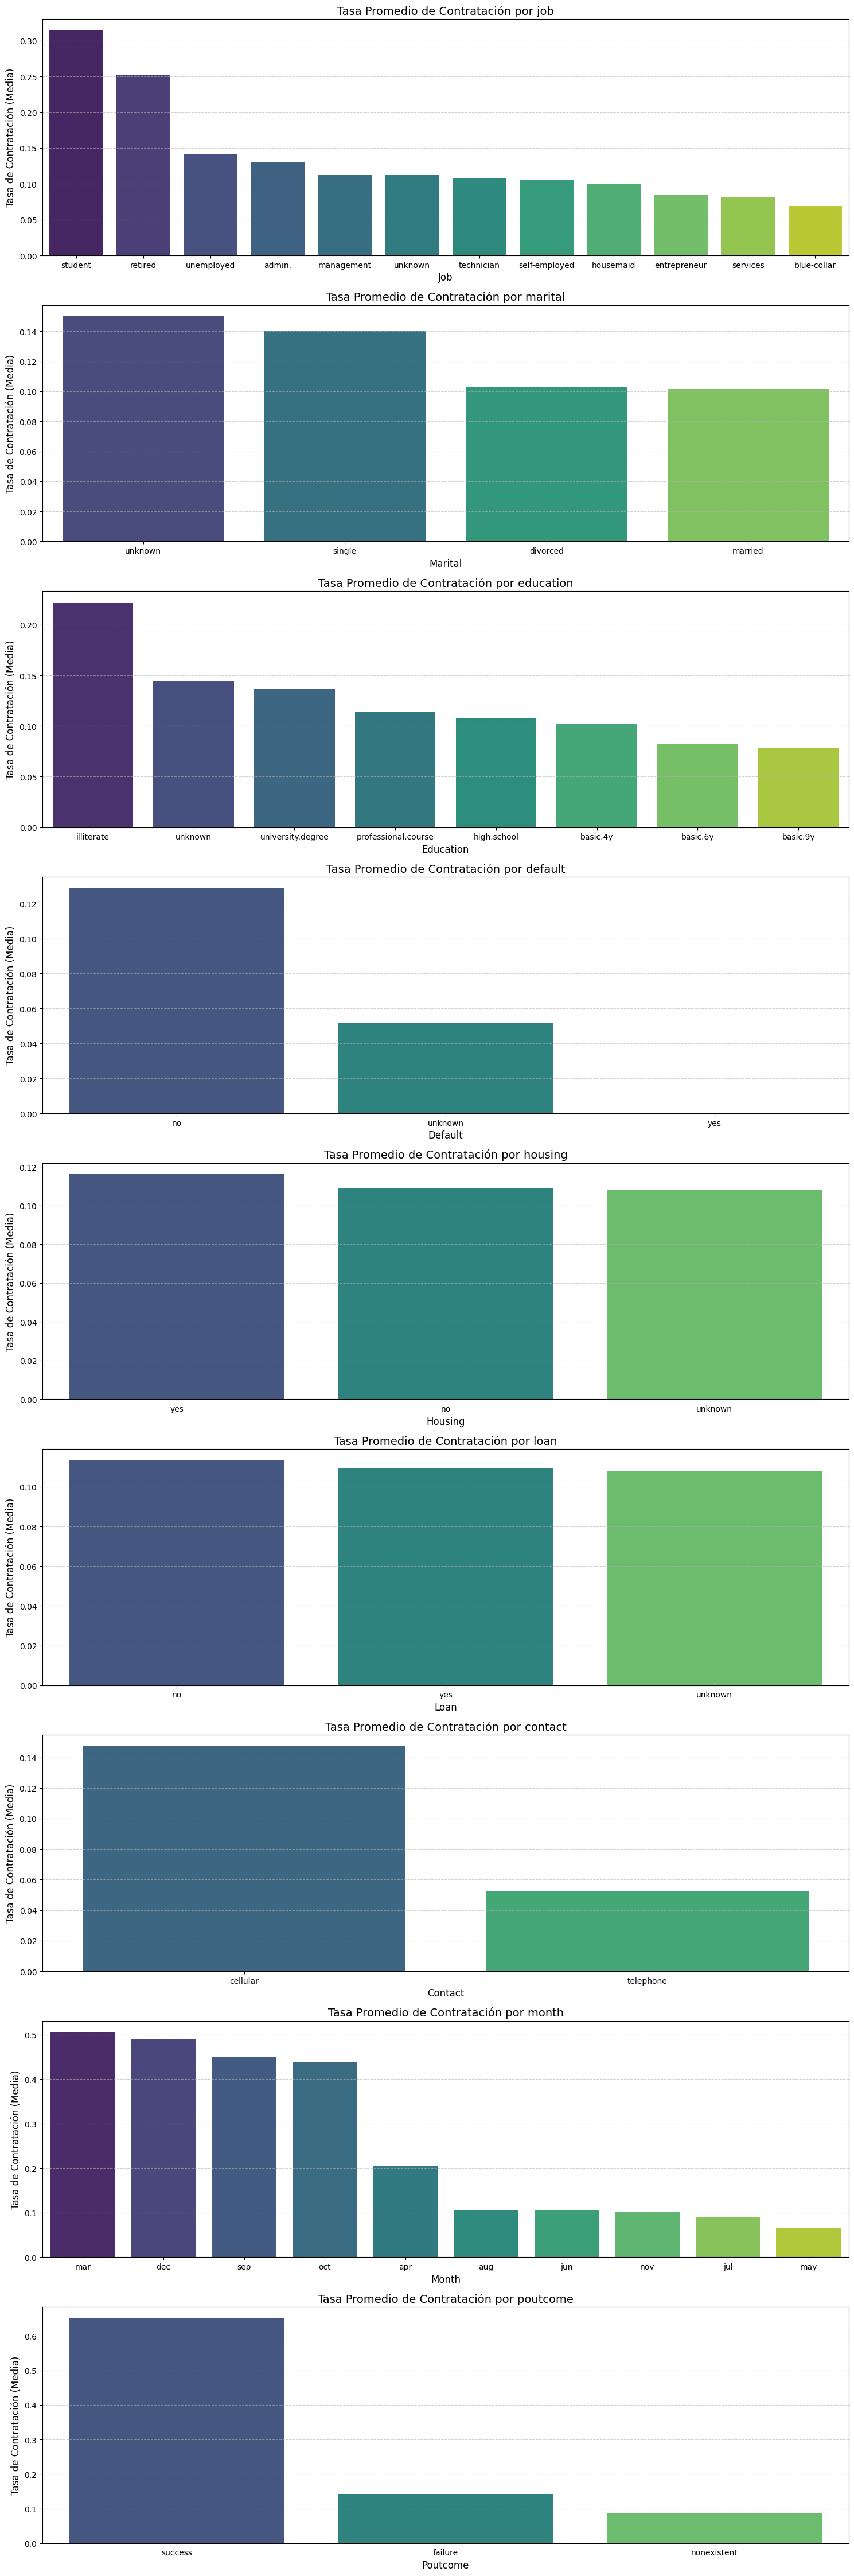

In [87]:
#job. Tipo de trabajo (categórico)
#marital. Estado civil (categórico)
#education. Nivel de educación (categórico)
#default. ¿Tiene crédito actualmente? (categórico)
#housing. ¿Tiene un préstamo de vivienda? (categórico)
#loan. ¿Tiene un préstamo personal? (categórico)
#contact. Tipo de comunicación de contacto (categórico)
#month. Último mes en el que se le ha contactado (categórico)
#poutcome. Resultado de la campaña de marketing anterior (categórico)

cat_colum = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axes = plt.subplots(len(cat_colum), 1, figsize=(15, 5 * len(cat_colum)))

for i, col in enumerate(cat_colum):
    avg_subs = df_inicio.groupby(col)['contract'].mean().sort_values(ascending=False).reset_index()
    
    sns.barplot(data=avg_subs, hue=col, x=col, y='contract',
                ax=axes[i], legend=False,
                palette='viridis')
    
    axes[i].set_title(f'Tasa Promedio de Contratación por {col}', fontsize=14)
    axes[i].set_ylabel('Tasa de Contratación (Media)', fontsize=12)
    axes[i].set_xlabel(col.capitalize(), fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

> Observaciones:
>
> - Observamos que tanto estudiantes como retirados son las profesiones que tienen la media de contratación más elevada.
> - Los solteros y los no definidos tienden a contratar más los depositos que los casados o divorciados.
> - En tema de estudios, los que no tienen formación son más dados a la contratación de depositos.
> - Los que no tienen créditos contratan más depósitos que los que si.
> - Hay una paridad en contratación entre las personas que tienen hipotecas y prestamos personales. Son semejantes las medias.
> - Las personas que han sido contactadas por Móvil han realizado más contrataciones que las contactadas por teléfono.
> - Los meses que se contrataron más depósitos son marzo, diciembre, septiembre y octubre.
> - En relación a la campaña anterior. Las personas que en la campaña anterior contrataron, también lo hicieron en esta.

> ### Variables numéricas

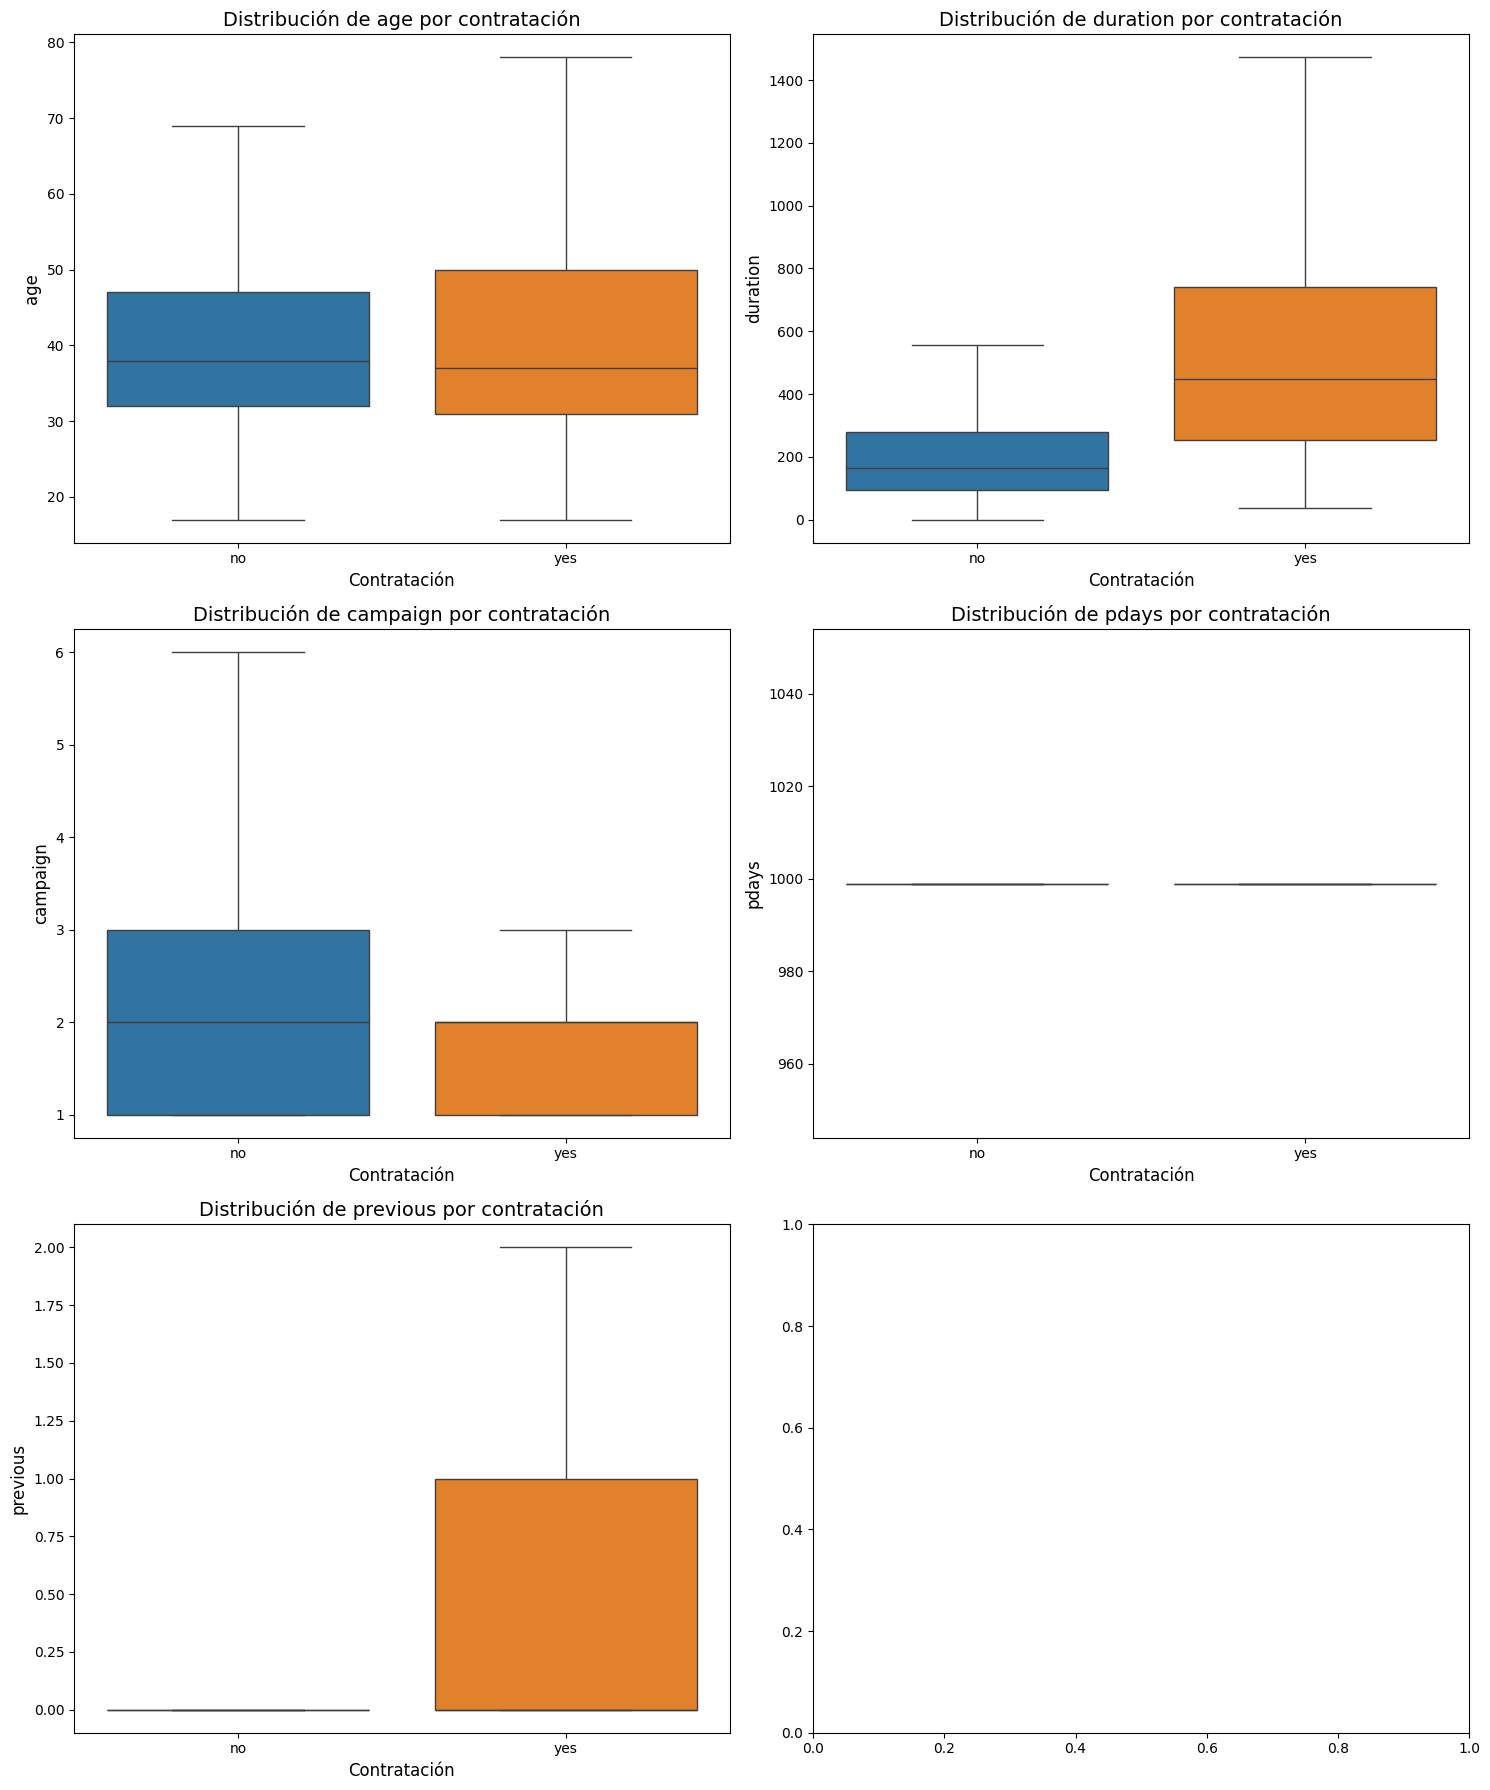

In [94]:
# Columnas numéricas clave
#age. Edad del cliente (numérico)
#duration. Duración del contacto previo en segundos (numérico)
#campaign. Número de contactos realizados durante esta campaña al cliente (numérico)
#pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
#previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)

num_colum = ['age', 'duration', 'campaign','pdays','previous']
n_columnas = 2
n_filas = math.ceil(len(num_colum) / n_columnas)

fig, axes = plt.subplots(n_filas, n_columnas,figsize=(15, 6 * n_filas))

axes = axes.flatten()

for i, col in enumerate(num_colum):
    sns.boxplot(data=df_inicio, hue='y', x='y', y=col, ax=axes[i],
                showfliers=False) # Ocultar outliers extremos para mejor visualización
    
    axes[i].set_title(f'Distribución de {col} por contratación', fontsize=14)
    axes[i].set_xlabel('Contratación', fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()

> Observaciones:
> - adfsdfsdfsdf